# Import Libraries

In [48]:
# !pip install matplotlib
# !pip install opencv-python

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot

In [2]:
def plot_image(image, title, cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')

# Image Array

In [3]:
image = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
], dtype=np.float32)

In [4]:
image.shape

(5, 5)

# Kernels

In [5]:
kernels = [
    np.array([
        [1, 1, 1],
        [0, 0, 0],
        [-1, -1, -1]
    ], dtype=np.float32),
    np.array([
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ], dtype=np.float32),
    np.array([
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]
    ], dtype=np.float32)
]


# Convolution Operation

In [6]:
def apply_padding(image, padding):
    if padding > 0:
        return np.pad(image, pad_width=((padding, padding), (padding, padding)), mode='constant', constant_values=0)
    return image

In [7]:
apply_padding(image,padding=1)

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
def convolve(image, kernel, padding=0, stride=1):
    kernel_height, kernel_width = kernel.shape
    
    # Apply padding to the image
    image_padded = apply_padding(image, padding)
    image_height, image_width = image_padded.shape
    
    # Calculate the dimensions of the output image
    output_height = (image_height - kernel_height) // stride + 1
    output_width = (image_width - kernel_width) // stride + 1
    
    # Initialize the output image
    output = np.zeros((output_height, output_width))
    
    # Perform the convolution operation
    for i in range(0, output_height):
        for j in range(0, output_width):
            # Extract the region of interest
            region = image_padded[i*stride:i*stride+kernel_height, j*stride:j*stride+kernel_width]
            output[i, j] = np.sum(region * kernel)
    
    return output


# Max Pooling

In [9]:
def max_pooling(image, pool_size=2):
    output_height = image.shape[0] // pool_size
    output_width = image.shape[1] // pool_size
    result = np.zeros((output_height, output_width))
    
    for i in range(output_height):
        for j in range(output_width):
            result[i, j] = np.max(image[i*pool_size:(i+1)*pool_size, j*pool_size:(j+1)*pool_size])
    
    return result

# Plot

Convolution result with kernel 1:
 [[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1. -2. -3. -2. -1.  0.]
 [ 0. -1. -1. -2. -1. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  1.  2.  1.  1.  0.]
 [ 0.  1.  2.  3.  2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]
********
Shape Before Convolution (5, 5)
Shape After Convolution (7, 7)
********
ReLU result with kernel 1:
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 2. 1. 1. 0.]
 [0. 1. 2. 3. 2. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
********
Shape Before Max Pooling (7, 7)
Shape After Max Pooling (3, 3)
********
Max Pooling result with kernel 1:
 [[0. 0. 0.]
 [0. 0. 0.]
 [1. 3. 2.]]
********************************************
Convolution result with kernel 2:
 [[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1. -1.  0.  1.  1.  0.]
 [ 0. -2. -1.  0.  1.  2.  0.]
 [ 0. -3. -2.  0.  2.  3.  0.]
 [ 0. -2. -1.  0.  1.  2.  0.]
 [ 0. -1. -1.  0.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]
********
Shape Bef

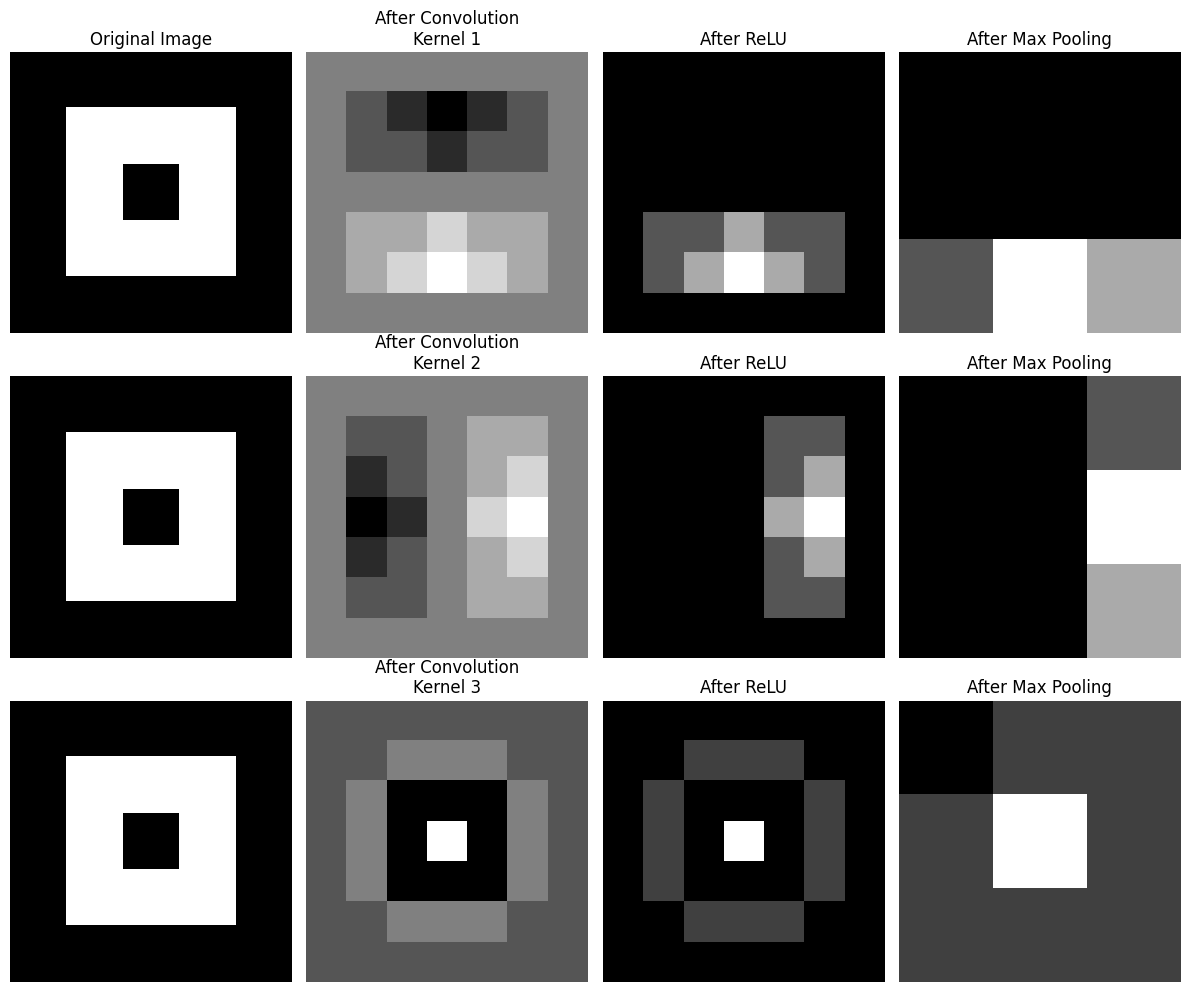

In [10]:
plt.figure(figsize=(12, 10))

for idx, kernel in enumerate(kernels):
    
    # Convolution HERE
    conv_result = convolve(image, kernel=kernel, padding=2, stride=1)
    

    print(f"Convolution result with kernel {idx + 1}:\n", conv_result)
    print("********")
    print(f"Shape Before Convolution", image.shape)
    print(f"Shape After Convolution", conv_result.shape)
    print("********")
    
    relu_result = np.maximum(conv_result, 0)
    print(f"ReLU result with kernel {idx + 1}:\n", relu_result)
    
    # Max Pooling HERE
    pooled_result = max_pooling(relu_result, pool_size=2)

    print("********")
    print(f"Shape Before Max Pooling", conv_result.shape)
    print(f"Shape After Max Pooling", pooled_result.shape)
    print("********")
    

    print(f"Max Pooling result with kernel {idx + 1}:\n", pooled_result)
    print("********************************************")
    
    # Plotting the results for each kernel
    plt.subplot(len(kernels), 4, idx * 4 + 1)
    plot_image(image, 'Original Image' if idx == 0 else '')
    
    plt.subplot(len(kernels), 4, idx * 4 + 2)
    plot_image(conv_result, f'After Convolution\nKernel {idx + 1}')
    
    plt.subplot(len(kernels), 4, idx * 4 + 3)
    plot_image(relu_result, 'After ReLU')
    
    plt.subplot(len(kernels), 4, idx * 4 + 4)
    plot_image(pooled_result, 'After Max Pooling')

plt.tight_layout()
plt.show()

In [11]:
arr = np.array(
    [
    [[2, 4,0],
    [3, 4,1],
    [0, 1, 1]],    
    
    [[0, 0,0],
    [2, 4,1],
    [3, 1, 1]],
    
    [[0, 0,0],
    [0, 4,1],
    [0, 1, 1]]])

In [12]:
arr

array([[[2, 4, 0],
        [3, 4, 1],
        [0, 1, 1]],

       [[0, 0, 0],
        [2, 4, 1],
        [3, 1, 1]],

       [[0, 0, 0],
        [0, 4, 1],
        [0, 1, 1]]])

In [13]:
arr.flatten()

array([2, 4, 0, 3, 4, 1, 0, 1, 1, 0, 0, 0, 2, 4, 1, 3, 1, 1, 0, 0, 0, 0,
       4, 1, 0, 1, 1])